In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [72]:
def generate(num_points, m=2.75, c=0.0):
    x = np.random.uniform(0, 100, size=num_points)
    y = m * x + c + np.random.normal(0, 30, size=num_points)
    return x, y
    

In [73]:
x, y = generate(100)

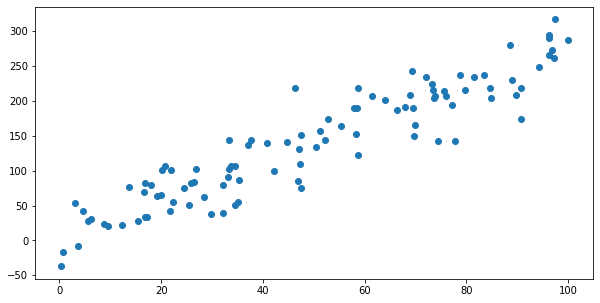

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x, y)
plt.savefig('points.png')

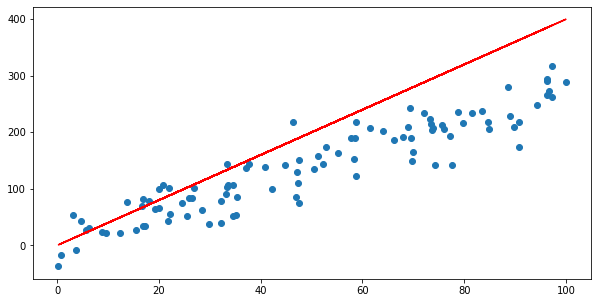

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, (lambda x: 4 * x)(x), '-r')
plt.savefig('points1.png')

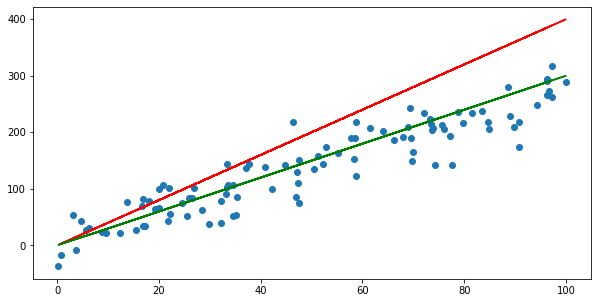

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, (lambda x: 4 * x)(x), '-r')
plt.plot(x, (lambda x: 3 * x)(x), '-g')
plt.savefig('points2.png')

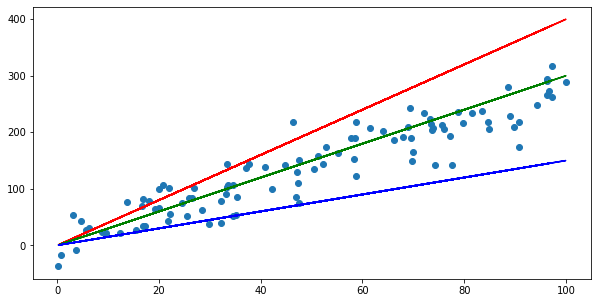

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, (lambda x: 4 * x)(x), '-r')
plt.plot(x, (lambda x: 3 * x)(x), '-g')
plt.plot(x, (lambda x: 1.5 * x)(x), '-b')
plt.savefig('points3.png')

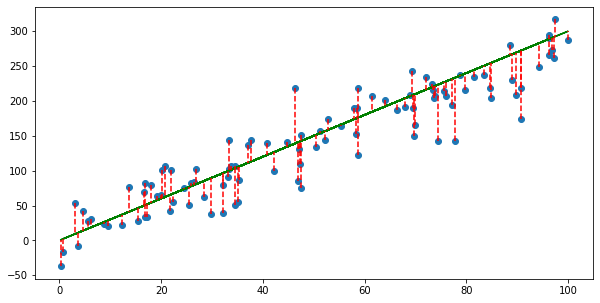

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, (lambda x: 3 * x)(x), '-g')
for a, b in zip(x, y):
    y_hat = (lambda x: 3 * x)(a)
    plt.plot([a, a], [b, y_hat], '--r')
plt.savefig('points4.png')

In [79]:
def gradient(w):
    acc = -2 * x * (y - w * x)
    return np.mean(acc)

In [80]:
def gd(f_prime, alpha, lo=1, hi=5, epochs=100):
    x_t = np.random.uniform(lo, hi)
    grad_t = f_prime(x_t)
    for i in range(epochs):
        x_t = x_t - alpha * grad_t
        grad_t = f_prime(x_t)
    return x_t

In [86]:
def gd(f_prime, alpha, lo=0, hi=100, epsilon=0.00001, epochs=100):
    x_t = np.random.uniform(lo, hi)
    grad_t = f_prime(x_t)
    i = 0
    while abs(grad_t) > epsilon and i < epochs:
        x_t = x_t - alpha * grad_t
        grad_t = f_prime(x_t)
        i += 1
    return x_t

In [194]:
w_star = gd(gradient, 0.00001)
print(w_star)

2.8370655634239337


In [82]:
import sklearn.linear_model as linear_model

In [83]:
lr = linear_model.LinearRegression()

In [84]:
lr.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
lr.coef_

array([2.65794018])

In [91]:
import torch as th
import torch.nn as nn
import torch.optim as optim
import torch.functional as F

In [190]:
w = nn.Parameter(data=th.tensor(np.random.uniform(0, 5)))
lr = 0.00001
optimizer = optim.SGD([w], lr=lr)
loss = nn.MSELoss()
y_tensor = th.tensor(y, requires_grad=True)
x_tensor = th.tensor(x, requires_grad=True)

In [191]:
for i in range(100):
    y_hat = w * x_tensor
    loss_val = loss(y_hat, y_tensor)
    loss_val.backward()
    optimizer.step()
    w.grad.zero_()
    

In [192]:
w

Parameter containing:
tensor(2.7762, requires_grad=True)